In [1]:
import json 
import csv 
  
  
# Opening JSON file and loading the data 
# into the variable data 
with open('Desktop/generated.json') as json_file: 
    data = json.load(json_file) 
  
company_data = data['financials'] 
  
# now we will open a file for writing 
data_file = open('data_file.csv', 'w') 
  
# create the csv writer object 
csv_writer = csv.writer(data_file) 
  
# Counter variable used for writing  
# headers to the CSV file 
count = 0
  
for i in company_data: 
    if count == 0: 
  
        # Writing headers of CSV file 
        header = i.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(i.values()) 
  
data_file.close()

In [2]:
#using the converted json as a pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data_file.csv')
print(df)

    year  revenue  ebitdaMargin
0   2005     8.49          6.51
1   2006    10.71          5.55
2   2007    14.84          6.07
3   2008    19.17          5.89
4   2009    24.51          6.15
5   2010    34.20          5.77
6   2011    48.08          4.05
7   2012    61.09          4.64
8   2013    74.45          5.37
9   2014    88.99          5.53
10  2015   107.01          7.96
11  2016   135.99          9.05
12  2017   177.87          8.76
13  2018   232.89         11.92
14  2019   280.52         12.95


In [14]:
#finding yearly growth and filling NA values
df['Yearly Growth'] = (((df['revenue'] - df['revenue'].shift(1))/df['revenue'].shift(1))*100).round(2)
df['Yearly Growth'] = df['Yearly Growth'].fillna(0)
print(df)

    year  revenue  ebitdaMargin  Yearly Growth
0   2005     8.49          6.51           0.00
1   2006    10.71          5.55          26.15
2   2007    14.84          6.07          38.56
3   2008    19.17          5.89          29.18
4   2009    24.51          6.15          27.86
5   2010    34.20          5.77          39.53
6   2011    48.08          4.05          40.58
7   2012    61.09          4.64          27.06
8   2013    74.45          5.37          21.87
9   2014    88.99          5.53          19.53
10  2015   107.01          7.96          20.25
11  2016   135.99          9.05          27.08
12  2017   177.87          8.76          30.80
13  2018   232.89         11.92          30.93
14  2019   280.52         12.95          20.45


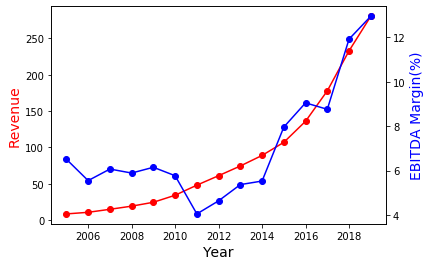

In [34]:
#plotting revenue and ebitdaMargin different commodities
fig,ax=plt.subplots()
ax.plot(df['year'], df["revenue"], color='red', marker="o")
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Revenue",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(df['year'], df["ebitdaMargin"],color="blue",marker="o")
ax2.set_ylabel("EBITDA Margin(%)",color="blue",fontsize=14)
plt.show()

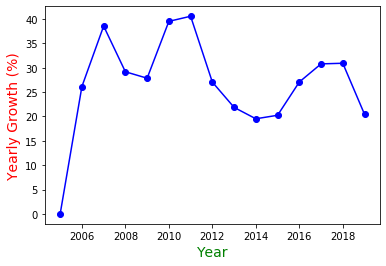

In [16]:
#plotting yearly growth
fig,ax=plt.subplots()
ax.plot(df['year'], df["Yearly Growth"], color='blue', marker="o")
ax.set_xlabel("Year",color= 'green',fontsize=14)
ax.set_ylabel("Yearly Growth (%)",color="red",fontsize=14)
plt.show()

In [21]:
#converting the dataframe into a temporary dictionary
mydict = dict(zip(df['year'], df['Yearly Growth']))
print(mydict)

{2005: 0.0, 2006: 26.15, 2007: 38.56, 2008: 29.18, 2009: 27.86, 2010: 39.53, 2011: 40.58, 2012: 27.06, 2013: 21.87, 2014: 19.53, 2015: 20.25, 2016: 27.08, 2017: 30.8, 2018: 30.93, 2019: 20.45}


In [22]:
#rule based approach to be replaced by boxplot
for key, value in mydict.items():
    if value == 0:
        print("Starting Point for growth calculation is- ", key)
    if value >0 and value <= df['Yearly Growth'].max()/4:
        print("Poor growth for the year- ", key)
    if value > df['Yearly Growth'].max()/4 and value <= df['Yearly Growth'].max()/2:
        print("Low growth for the year- ", key)
    if value > df['Yearly Growth'].max()/2 and value <= 3*df['Yearly Growth'].max()/4:
        print("Moderate growth for the year- ", key)
    if value > 3*df['Yearly Growth'].max()/4 and value <= df['Yearly Growth'].max():
        print("High growth for the year- ", key)
print()
print("Max Growth Rate is- ", df['Yearly Growth'].max(),"%")
print()
x=df['Yearly Growth'].sum()
y=len(df['year'])
Average= (x/(y-1)).round(2)
print("Average Growth Rate is- ", Average, "%")

Starting Point for growth calculation is-  2005
Moderate growth for the year-  2006
High growth for the year-  2007
Moderate growth for the year-  2008
Moderate growth for the year-  2009
High growth for the year-  2010
High growth for the year-  2011
Moderate growth for the year-  2012
Moderate growth for the year-  2013
Low growth for the year-  2014
Low growth for the year-  2015
Moderate growth for the year-  2016
High growth for the year-  2017
High growth for the year-  2018
Moderate growth for the year-  2019

Max Growth Rate is-  40.58 %

Average Growth Rate is-  28.56 %


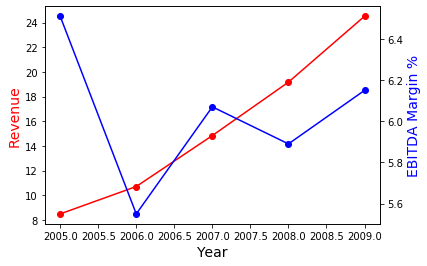

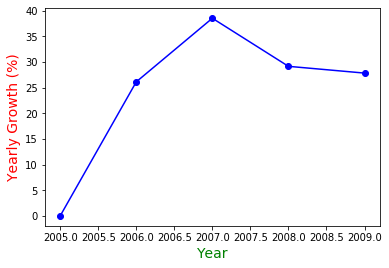

Starting Point for growth calculation is-  2005
Moderate growth for the year-  2006
High growth for the year-  2007
Moderate growth for the year-  2008
Moderate growth for the year-  2009

Max Growth Rate in this period is-  38.56 %

Average Growth Rate in this period is-  30.44
Average Growth Rate in this period is higher than the overall average by-  1.88 %


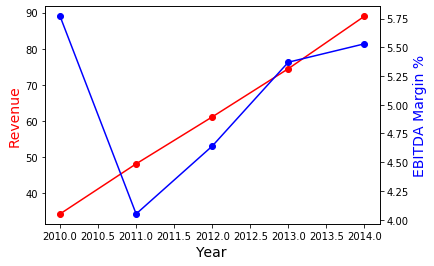

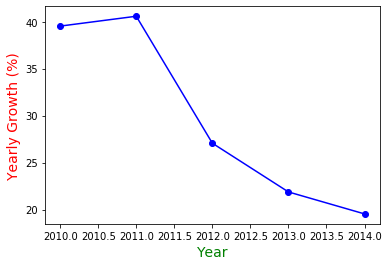

High growth for the year-  2010
High growth for the year-  2011
Moderate growth for the year-  2012
Moderate growth for the year-  2013
Low growth for the year-  2014

Max Growth Rate in this period is-  40.58 %

Average Growth Rate in this period is-  29.71
Average Growth Rate in this period is higher than the overall average by-  1.15 %


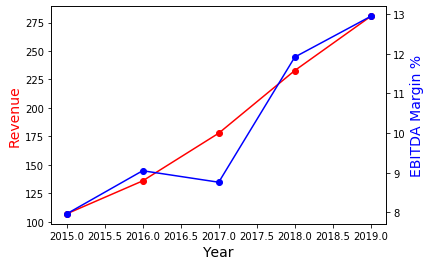

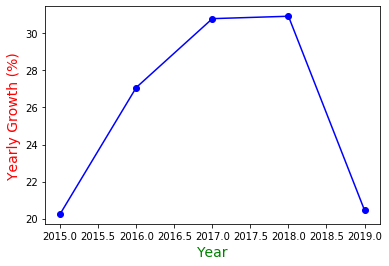

Low growth for the year-  2015
Moderate growth for the year-  2016
High growth for the year-  2017
High growth for the year-  2018
Moderate growth for the year-  2019

Max Growth Rate in this period is-  30.93 %

Average Growth Rate in this period is-  25.9
Average Growth Rate in this period is lower than the overall average by-  2.66 %


In [47]:
#segmentations in time period
t=5
for i in range(3):
    df2=df.iloc[i*t:(i+1)*t]
    fig,ax=plt.subplots()
    ax.plot(df2['year'], df2['revenue'], color='red', marker="o")
    ax.set_xlabel("Year",fontsize=14)
    ax.set_ylabel("Revenue",color="red",fontsize=14)
    ax2=ax.twinx()
    ax2.plot(df2['year'], df2["ebitdaMargin"],color="blue",marker="o")
    ax2.set_ylabel("EBITDA Margin %",color="blue",fontsize=14)
    plt.show()
    fig,ax=plt.subplots()
    ax.plot(df2['year'], df2["Yearly Growth"], color='blue', marker="o")
    ax.set_xlabel("Year",color= 'green',fontsize=14)
    ax.set_ylabel("Yearly Growth (%)",color="red",fontsize=14)
    plt.show()
    p=df2['Yearly Growth'].sum()
    q=len(df2['year'])
    if i is 0:
        Average2= (p/(q-1)).round(2)
    else:
        Average2= (p/(q)).round(2)
    mydict2 = dict(zip(df2['year'], df2['Yearly Growth']))
    for key, value in mydict2.items():
        if value == 0:
            print("Starting Point for growth calculation is- ", key)
        if value >0 and value <= df['Yearly Growth'].max()/4:
            print("Poor growth for the year- ", key)
        if value > df['Yearly Growth'].max()/4 and value <= df['Yearly Growth'].max()/2:
            print("Low growth for the year- ", key)
        if value > df['Yearly Growth'].max()/2 and value <= 3*df['Yearly Growth'].max()/4:
            print("Moderate growth for the year- ", key)
        if value > 3*df['Yearly Growth'].max()/4 and value <= df['Yearly Growth'].max():
            print("High growth for the year- ", key)
    print()
    print("Max Growth Rate in this period is- ", df2['Yearly Growth'].max(),"%")
    print()
    print("Average Growth Rate in this period is- ", Average2)
    if Average2<Average:
        print("Average Growth Rate in this period is lower than the overall average by- ", (Average-Average2).round(2), "%")
    if Average2>Average:
        print("Average Growth Rate in this period is higher than the overall average by- ", (Average2-Average).round(2), "%")
    